In [1]:
from week1 import calculateDatasetShannonEntropy
calculateDatasetShannonEntropy([0,0,1,1])

1.0

# samples from a normal distribution with mu  and sigma using numpy
# For random samples from N(\mu, \sigma^2), use:

# sigma * np.random.randn(...) + mu

numpy.random.randint(low, high=None, size=None, dtype='l')
Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

In [2]:
import numpy as np
samples = np.random.randint(0,2, 10)
print(samples)

[0 0 1 0 0 1 1 1 0 0]


In [3]:
from week1 import entropy, calculateDatasetShannonEntropy
Hs = calculateDatasetShannonEntropy(samples)
print(Hs)

0.9709505944546688


In [4]:
samples = np.random.randint(0,4, 100)
print(samples)
Hs = calculateDatasetShannonEntropy(samples)
print(Hs)

[2 3 2 3 2 2 0 0 1 0 0 2 0 2 0 1 3 2 2 1 1 1 1 2 3 2 1 2 0 2 2 1 3 1 0 1 1
 0 1 2 3 3 0 3 1 2 0 3 0 3 1 0 2 1 1 0 1 3 0 2 0 2 2 1 1 3 3 1 1 3 3 3 3 3
 2 3 2 1 0 0 1 3 0 1 1 3 1 2 2 3 2 1 0 1 3 2 1 0 3 2]
1.9901497155144277


# Conditional entropy

In [5]:
def conditionalentropy(p: np.array):
    # entropyXGivenY
    # H(X|Y)
    # 2 dim only for now

    # e.g.
    # p(x,y)
    # coded for Y rows (dim=0) \X   columns (dim=1)
    # =>
    # transpose(p)
    # p = np.array([[0.125, 0.0625, 0.03125, 0.03125],
    #       [0.0625, 0.125, 0.03125, 0.03125],
    #       [0.0625, 0.0625, 0.0625, 0.0625],
    #       [0.25,0,0,0]])
    # Correct answer = 11/8 = 1.375 fro transpose p                    
    if (type(p) == list):
        p = np.array(p)

    p = np.transpose(p)

    total = 0
    for i in range(p.shape[0]):
        pyi = np.sum(p[i])
        total+= pyi * entropy(1/pyi * p[i])

    return total

In [6]:
p1 = np.array([[0.2, 0.3],[0.1, 0.4]])
print(p1)
print(p1[:,0])

[[0.2 0.3]
 [0.1 0.4]]
[0.2 0.1]


In [7]:
def conditionalentropy2(p: np.array):
    # entropyXGivenY
    # H(X|Y)
    # 2 dim only for now

       # X = rows
     # Y = columnscoded
    if (type(p) == list):
        p = np.array(p)

    total = 0
    for i in range(p.shape[1]):
        pxi = np.sum(p[i])
        total+= :,pxi * entropy1(1/pxi * p[i])

    rturn total:,

In [8]:
print(conditionalentropy(p1))
print(conditionalentropy2(p1))

0.9651484454403229
0.9651484454403229


Test that your code works, e.g. by running:    
conditionalentropy([0.2, 0.3; 0.1, 0.4]) and validating that you get the result 0.965 bits.     
conditionalentropy([0.5, 0; 0, 0.5]) and validating that you get the result 0 bits.    
conditionalentropy([0.25, 0.25; 0.25, 0.25]) and validating that you get the result 1 bit. 

In [9]:
from week1 import conditionalEntropy

conditionalEntropy([[0.2,0.3],[0.1,0.4]])

0.9651484454403229

In [10]:
conditionalEntropy([[0.5,0],[0,0.5]])

0.0

In [11]:
conditionalEntropy([[0.25,0.25],[0.25,0.25]])

1.0

# Joint entropy

In [12]:
from week1 import jointEntropy


In [13]:
p2 = np.array([[0.2, 0.3],[0.1, 0.4]])
jointEntropy(p2)

1.8464393446710154

In [14]:
np.sum(p2)

1.0

In [15]:
from math import log2, isclose
import numpy as np
import matplotlib.pyplot as plt
from contextlib import suppress
import collections
import scipy.stats as scips

#test:p = np.array([[0.2, 0.3],[0.1, 0.4]])
# => jointEntropy : 1.8464393446710154

def jointEntropy(p: np.array):

    if type(p) == list:
        p = np.array(p)

    if ( np.sum(p) != 1) :
        raise Exception('The sum of the elements of p should be = 1{}'.format(p))

    # Perform element-wise p(x,y)*log p(x,y)
    plogp = lambda x: - x * np.where(x > 0, np.log2(x), 0)
    Hs = np.array([plogp(pij) for pij in p])

    return  np.sum(Hs)

In [16]:
p2 = np.array([[0.2, 0.3],[0.1, 0.4]])
jointEntropy(p2)

1.8464393446710154

In [17]:
plogp = lambda p: - p * np.where(p > 0, np.log2(p), 0)


In [18]:
plogp(0.34)

0.5291737384982911

In [19]:
plogp(0)

<ipython-input-17-f8d1d2e4c4c3>:1: RuntimeWarning: divide by zero encountered in log2
  plogp = lambda p: - p * np.where(p > 0, np.log2(p), 0)


0.0

In [20]:
p = np.array([[0.2, 0.3],[0.1, 0.4]])
Hs = np.array([plogp(pij) for pij in p])
np.sum(Hs)

1.8464393446710154

# joint entropy in more than 2 dimensions

In [21]:

def jointEntropy(p: np.array):

    if type(p) == list:
        p = np.array(p)

    if not isclose(np.sum(p), 1, rel_tol=1e-6):
        raise Exception('The sum of the elements of p should be = 1{}'.format(p))

    # Perform element-wise p(x,y)*log p(x,y)
    plogp = lambda x: - x * np.where(x > 0, np.log2(x), 0)
    Hs = np.array([plogp(pij) for pij in p])

    return  np.sum(Hs)

p3 = np.zeros((3,3,3))
p3[0,0,0] = 1
print(p3)
np.sum(p3)

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


1.0

In [22]:
jointEntropy(p3)

<ipython-input-21-b56250aecc45>:10: RuntimeWarning: divide by zero encountered in log2
  plogp = lambda x: - x * np.where(x > 0, np.log2(x), 0)


0.0

In [23]:
p4 = np.array([1/27 for i in range(27)]).reshape((3,3,3))
print(p4)

[[[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]]


In [24]:
jointEntropy(p4)

4.754887502163469

In [25]:
np.sum(p4)

0.9999999999999998

# Coding Joint entropy

In [26]:
def jointEntropy(p: np.array):

    if type(p) == list:
        p = np.array(p)

    if not isclose(np.sum(p), 1, rel_tol=1e-6):
        raise Exception('The sum of the elements of p should be = 1{}'.format(p))

    # Perform element-wise p(x,y)*log p(x,y)
    plogp = lambda x: - x * np.where(x > 0, np.log2(x), 0)
    Hs = np.array([plogp(pij) for pij in p])

    return  np.sum(Hs)

Test that your code works, e.g. by running jointentropy([0.2, 0.3; 0.1, 0.4]) and validating that you get the result 1.85 bits

In [27]:
jointEntropy([[0.2, 0.3],[ 0.1, 0.4]])

1.8464393446710154

## joint entropy in multiple dimensions

In [28]:
p3 = np.zeros((3,3,3))
p3[0,0,0] = 1
print(p3)
np.sum(p3)

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


1.0

In [29]:
jointEntropy(p3)

<ipython-input-26-f19df8953227>:10: RuntimeWarning: divide by zero encountered in log2
  plogp = lambda x: - x * np.where(x > 0, np.log2(x), 0)


0.0

In [30]:
p4 = np.array([1/27 for i in range(27)]).reshape((3,3,3))
print(p4)

[[[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]

 [[0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]
  [0.03703704 0.03703704 0.03703704]]]


In [31]:
jointEntropy(p4)

4.754887502163469

# 8. (Extension) Coding joint entropy for empirical data

rows = samples x[i] of X (i=1..N, number of samples)
columns = variables/features  
here will always be multiple rows (because we always should have many samples), but the number of columns will depend on how many variables we are jointly considering (it could be just one if we have only a single variable).

In [32]:
import itertools
from collections import Counter

some_list = [['foobar', 'acling', 'b'], ['xbar', 'cling', 'd'], ['foobar', 'dcling', 'b'], ['xbar', 'acling', 'd']]
# totals = Counter(i for i in list(itertools.chain.from_iterable(some_list)))

some_list = np.array(some_list)
totals2 = Counter(list(some_list.flatten()))

print(some_list)
print(some_list.flatten())
print(list(some_list.flatten()))
print(totals2)

def jointEntropyEmpirical(samples: np.array):

    # check only 2D

    # Each row of item represent a sample with the columns being the random variables or features of interest
    # row 0 : X
    # row 1 : Y

    H, edges = np.histogramdd(samples)

    for i in range(p.shape[0]):  #iterate over samples
        xiCount = collections.Counter(items[i])


def calculateDatasetShannonEntropy(items):
    # also called empiricalentropy in course
    itemscount = collections.Counter(items)
    
    # probability = # item x / # total number of items
    dist = [x/sum(itemscount.values()) for x in itemscount.values()]
 
    # use scipy to calculate entropy
    entropy_value = scips.entropy(dist, base=2)
 
    return entropy_value

[['foobar' 'acling' 'b']
 ['xbar' 'cling' 'd']
 ['foobar' 'dcling' 'b']
 ['xbar' 'acling' 'd']]
['foobar' 'acling' 'b' 'xbar' 'cling' 'd' 'foobar' 'dcling' 'b' 'xbar'
 'acling' 'd']
['foobar', 'acling', 'b', 'xbar', 'cling', 'd', 'foobar', 'dcling', 'b', 'xbar', 'acling', 'd']
Counter({'foobar': 2, 'acling': 2, 'b': 2, 'xbar': 2, 'd': 2, 'cling': 1, 'dcling': 1})


https://stackoverflow.com/questions/20332750/python-joint-distribution-of-n-variables    
https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html#numpy.histogram2d

In [33]:
samples = [['foobar', 'cling'], ['xbar', 'cling'], ['foobar', 'dcling'], ['xbar', 'acling']]
# totals = Counter(i for i in list(itertools.chain.from_iterable(some_list)))
samples = np.array(samples)

alphabetX=list(set(samples[:,0]))
print(alphabetX)
print(len(alphabetX))

alphabetY=list(set(samples[:,1]))
print(alphabetY)
print(len(alphabetY))

['foobar', 'xbar']
2
['cling', 'dcling', 'acling']
3


In [34]:

from week1 import jointEntropy
alphabetX=list(set(samples[:,0]))
alphabetY=list(set(samples[:,1]))

jointProbabilities=np.zeros((len(alphabetX), len(alphabetY)))

for i in range(samples.shape[0]):
    print('Sample {} : {}'.format(i, samples[i]))
    sample=samples[i]
    jointProbabilities[alphabetX.index(sample[0]), alphabetY.index(sample[1])]+=1

jointProbabilities/=samples.shape[0]

jointEntropy(jointProbabilities)


Sample 0 : ['foobar' 'cling']
Sample 1 : ['xbar' 'cling']
Sample 2 : ['foobar' 'dcling']
Sample 3 : ['xbar' 'acling']


2.0

In [35]:
print(alphabetX)
print(alphabetY)
print(jointProbabilities)

['foobar', 'xbar']
['cling', 'dcling', 'acling']
[[0.25 0.25 0.  ]
 [0.25 0.   0.25]]


In [36]:
jointEntropy(jointProbabilities)

2.0

In [37]:
from week1 import jointEntropyEmpirical

testdata2bits = [[0,0],[0,1],[1,0],[1,1]]
jointEntropyEmpirical(testdata2bits)

Sample 0 : [0 0]
Sample 1 : [0 1]
Sample 2 : [1 0]
Sample 3 : [1 1]


2.0

In [38]:
from week1 import entropyempirical

In [39]:
entropyempirical(['a','b','c','d'])

2.0

# conditional entropy H(X|Y) for empirical samples   
H(X|Y) = H(X,Y) - H(Y)   


In [40]:
from week1 import conditionalEntropyEmpirical


Test that your code works by running, e.g.:     
conditionalentropyempirical([0,0,1,1],[0,1,0,1]) and validating that you get the result 1 bit.    
conditionalentropyempirical([0,0,1,1],[0,0,1,1]) and validating that you get the result 0 bits.       

In [41]:
xn = [0,0,1,1]
yn = [0,1,0,1]
samples = list(zip(xn, yn))
print(samples)


[(0, 0), (0, 1), (1, 0), (1, 1)]


In [42]:
conditionalEntropyEmpirical(samples)

Sample 0 : [0 0]
Sample 1 : [0 1]
Sample 2 : [1 0]
Sample 3 : [1 1]


1.0

In [43]:
xn = [0,0,1,1]
yn = xn
samples = list(zip(xn, yn))

In [44]:
conditionalEntropyEmpirical(samples)

Sample 0 : [0 0]
Sample 1 : [0 0]
Sample 2 : [1 1]
Sample 3 : [1 1]


0.0

# Plot H(X=a) for alphabet size C vs Probability of a P(X=a) varying between 0 and 1 (a being one of the symbol of the alphabet)
make a similar plot for X with alphabet size c, assuming that p(x) for x~=1 is uniform as (1-p(x=1))/(c-1). How is the plot different as a function of c and why?

In [45]:

def probabilityVector(Pa: float, C: int):
    # C : number of symbol in the alphabet
    # Pa : varying probability of P(X=a)

    PRemainingSymbols = round((1 - Pa) / (C-1), 6)

    P = [ PRemainingSymbols for i in range(C)]
    P[0] = Pa
    return P

In [46]:
print(probabilityVector(0.4, 4))

[0.4, 0.2, 0.2, 0.2]


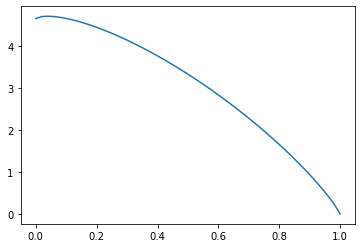

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from week1 import entropy

Pas=np.linspace(0, 1, num=51)

C = 26

plt.plot(Pas, [ entropy(probabilityVector(pa, C)) for pa in Pas])


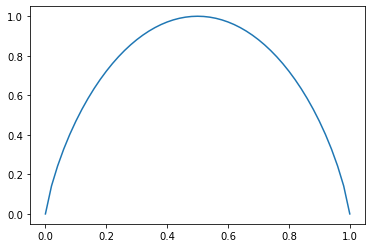

In [48]:
C = 26

plt.plot(Pas, [ entropy(probabilityVector(pa, 2)) for pa in Pas])

No handles with labels found to put in legend.


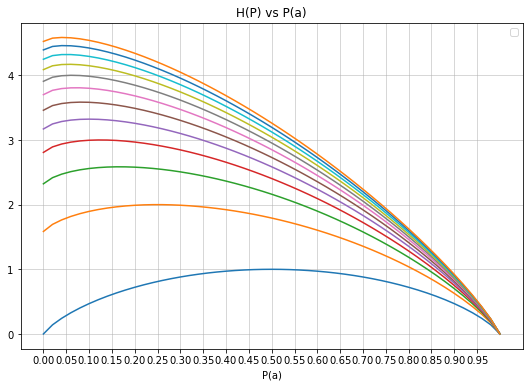

In [49]:
fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.grid(linestyle='-', linewidth=0.5)
for c in range(2,26,2):
    axs.plot(Pas, [ entropy(probabilityVector(pa, c)) for pa in Pas])
axs.set_title('H(P) vs P(a)')
axs.set_xticks(np.arange(0, 1, 0.05))
axs.set_xlabel('P(a)')
plt.legend()
plt.show()


# Week1 Challenge - Probability distribution of letter in a text
Take a look at the probability distribution of each letter of the alphabet (plus a space) gleaned from a sample text as displayed in Figure 2.1 (section 2.1) of Mackay

In [50]:
alphabet = ['a',
'b',
'c',
'd',
'e',
'f',
'g',
'h',
'i',
'j',
'k',
'l',
'm',
'n',
'o',
'p',
'q',
'r',
's',
't',
'u',
'v',
'w',
'x',
'y',
'z',
'_']
pSymbol = [0.0575,
0.0128,
0.0263,
0.0285,
0.0913,
0.0173,
0.0133,
0.0313,
0.0599,
0.0006,
0.0084,
0.0335,
0.0235,
0.0596,
0.0689,
0.0192,
0.0008,
0.0508,
0.0567,
0.0706,
0.0334,
0.0069,
0.0119,
0.0073,
0.0164,
0.0007,
0.192]

In [51]:
print(pSymbol)

[0.0575, 0.0128, 0.0263, 0.0285, 0.0913, 0.0173, 0.0133, 0.0313, 0.0599, 0.0006, 0.0084, 0.0335, 0.0235, 0.0596, 0.0689, 0.0192, 0.0008, 0.0508, 0.0567, 0.0706, 0.0334, 0.0069, 0.0119, 0.0073, 0.0164, 0.0007, 0.192]


## Calculate and display the Shannon information content for each letter (and space).

In [52]:
from week1  import infocontent

In [53]:
infocontentAlphabet = [infocontent(p) for p in pSymbol]

In [54]:
print(infocontentAlphabet)

[4.120294233717712, 6.28771237954945, 5.248793390257147, 5.132894270497346, 3.4532413295652273, 5.853084151912725, 6.23242994404826, 4.997693532616831, 4.061300186760664, 10.702749878828293, 6.895394956770689, 4.899695094204315, 5.411195432984449, 4.0685438590872876, 3.859352206845158, 5.7027498788282935, 10.287712379549449, 4.299027692777283, 4.140507454607221, 3.8241880062782694, 4.904008087075397, 7.1791879227712805, 6.392894616241506, 7.097887820669432, 5.930160374931366, 10.480357457491845, 2.380821783940931]


## What is the entropy of the letters (and spaces) - can you validate this is the weighted average of the Shannon information contents you computed?

In [55]:
entropyRecalc = np.sum(np.array([ a*b for (a,b) in zip(infocontentAlphabet,pSymbol) ]))

In [56]:
entropyWithFunction = entropy(pSymbol)

In [57]:
print(entropyRecalc)

4.108698089924512


In [58]:
print(entropyWithFunction)

4.108698089924511


## What does this mean about how many (good) questions you would need to ask on average in order to guess a letter sampled from this distribution?

We need to ask on average 4.1 yes/no questions

In [73]:
filename = './data/Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    text = f.read()

In [80]:
text.lower()

 trial is going to be character. i want you to find out everything you can about these people - and i mean everything.\nmmmm, this is pretty good chow, huh?\nwould it kill him to check up on us? no - drops off the meals and that\'s it. i realize we\'re prisoners, but we\'re still entitled to catsup.\ni guess we could\'ve called for help.\nbut then we would have missed the whole thing.\ni still had it on video. we could have watched it later.\nyeah, he\'s right.\ni forgot about the video.\nsure - the video.\nwhat is that?\nplane\'s ready.\nhi everybody, i\'m geraldo rivera. tonight we\'ll be talking about what most of you have probably been discussing in your homes, and around the water coolers in your offices. i am speaking of course of the controversial good samaritan trial that gets underway thursday in latham, massachusetts. now before we meet our distinguished panel, let\'s go to latham live, where jane wells is standing by. jane-\nyes. good evening, geraldo.\nwhat\'s the mood? wha

In [81]:
import string

words = ' '.join(text.lower().split())

In [75]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
import re
p = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]*')

In [82]:
processedStr = p.sub('', ' '.join(text.lower().split()))

In [87]:
sample = [ char for char in processedStr]
print(sample[1:50])

['o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'a', 't', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', 'l', 'l', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'd', 'o', ' ', 'y', 'o', 'u', ' ', 'k', 'n', 'o', 'w', ' ', 'w', 'h', 'y']


In [88]:
from week1 import entropyEmpirical
entropyEmpirical(sample)

4.093811389530425

## How does this compare to the stated value from Mackay (Links to an external site.) in Table 2.9 (sec 2.3; or see slide 26 of our lecture) as estimated from "The Frequently Asked Questions Manual for Linux"? Did you expect it to be the same, and why or why not?  

Just about the same. (4.09 vs 4.1)



## compute the Shannon information content of each character, and again compare these to those quoted by Mackay.

In [104]:
import collections
itemscount = collections.Counter(sample)

# probability = # item x / # total number of items
dist = [x/sum(itemscount.values()) for x in itemscount.values()]
shannonInfoContent = [infocontent(x/sum(itemscount.values())) for x in itemscount.values()]
for i, j in zip(itemscount.keys(), shannonInfoContent):
    print("{} : {}".format(i, j))


d : 5.292690965532893
o : 3.8181331980923665
  : 2.313054319761679
y : 5.170064270906951
u : 5.109043330368412
k : 6.321946167264879
n : 4.282538482944213
w : 5.547531382010156
h : 4.306855110538613
a : 4.033329919090657
t : 3.7510350193328637
i : 4.138407207319335
s : 4.478873846055354
l : 4.915160521031396
b : 6.443388992787079
e : 3.4366741024724847
r : 4.64353411419372
f : 6.412679048608646
g : 5.496655012783871
m : 5.583832895010305
j : 8.34955120852561
x : 9.974952605744832
p : 6.407841805710297
c : 5.947204431182949
v : 7.135106582404378
z : 10.514111416852863
q : 11.229985354677886
4 : 13.904486861897437
8 : 13.929148916131707
3 : 13.671652693839343
0 : 12.374912931042815
1 : 12.925009185770783
2 : 13.44135507441755
9 : 13.840710951464123
5 : 13.333173422688134
6 : 14.848530455923422
7 : 14.590732698455776
\ : 21.372092411980436


In [1]:
import string
import re

filename = './data/Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    text = f.read()
        
p = re.compile('[!"#\$%&\'\(\)\*\+\,-\.\/:;<=>\?@[\\\^_`{\|}~0-9]*')
processedStr = p.sub('', ' '.join(text.lower().split()))
#print(processedStr)

In [2]:
samples = [[char1, char2] for char1, char2 in list(zip(processedStr[slice(0, None, 1)], processedStr[slice(1, None, 1)])) ]

In [3]:
from week1 import jointEntropyEmpirical
jointEntropyEmpirical(samples)

7.453543202601456

In [5]:
from week1 import conditionalEntropyEmpirical
conditionalEntropyEmpirical(samples)

3.3665982758754547